In [1]:
import numpy as np
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler




In [2]:
# Read excel file (Dataset1)
path_dataset = "../dataset/excel/"
path_excel = f"{path_dataset}/Length_weight_shrimp2.xlsx"
df = pd.read_excel(path_excel,index_col=None,header=[0,1,2,3])



df

Unnamed: 0_level_0  บ่อกลางแจ้ง                                     \
   Unnamed: 0_level_1        B1115                              B1116   
   Unnamed: 0_level_2    21 ตัว/โล                          24 ตัว/โล   
                 num. น้ำหนัก (g.) ยาว (cm.) กว้าง (cm.) น้ำหนัก (g.)   
0                   1           52      20.1         2.1           42   
1                   2           44      19.0         2.1           48   
2                   3           59      20.2         2.5           41   
3                   4           48      19.0         2.0           47   
4                   5           63      21.0         2.5           58   
5                   6           58      20.5         2.3           40   
6                   7           54      19.5         2.5           45   
7                   8           46      19.0         2.0           44   
8                   9           47      19.5         2.1           34   
9                  10           50      19.5         2.3           39   
10                 11           46      19.2         2.2           34   
11                 12           52      20.0         2.5           35   
12                 13           42      18.2         2.0           45   
13                 14           50      20.2         2.5           47   
14                 15           49      19.5         2.0           50   
15                 16           53      20.1         2.5           59   
16                 17           39      18.3         2.0           34   
17                 18           40      18.5         2.0           45   
18                 19           44      19.0         2.2           36   
19                 20           43      18.7         2.2           40   
20                 21           37      18.5         2.2           39   
21                 22           43      18.7         2.5           44   
22                 23           41      19.0         2.0           36   
23                 24           46      19.4         2.5           36   
24                 25           35      18.0         2.0           37   

                                                             ...  \
                                B1125                        ...   
                            35 ตัว/โล                        ...   
   ยาว (cm.) กว้าง (cm.) น้ำหนัก (g.) ยาว (cm.) กว้าง (cm.)  ...   
0       18.7         2.0           34      17.0         1.7  ...   
1       19.0         2.0           26      15.0         1.6  ...   
2       18.0         2.0           31      16.5         1.8  ...   
3       19.1         2.0           21      14.5         1.6  ...   
4       20.2         2.3           30      16.0         1.8  ...   
5       18.0         2.0           25      15.2         1.8  ...   
6       19.0         2.0           33      16.5         1.7  ...   
7       18.5         2.2           36      16.5         1.8  ...   
8       14.5         1.8           36      17.0         1.9  ...   
9       18.0         1.8           25      15.5         1.6  ...   
10      11.5         1.8           27      15.7         1.8  ...   
11      17.0         2.0           26      15.5         1.6  ...   
12      18.6         2.0           34      16.5         1.9  ...   
13      19.0         2.0           27      16.0         1.8  ...   
14      19.5         2.0           37      17.5         2.0  ...   
15      20.5         2.5           26      16.0         1.6  ...   
16      17.0         1.8           24      15.0         1.5  ...   
17      18.2         2.0           28      16.2         1.8  ...   
18      17.0         1.7           28      16.1         1.8  ...   
19      18.0         2.0           26      15.8         1.8  ...   
20      17.0         1.7           27      15.5         1.7  ...   
21      18.0         2.0           25      15.3         1.8  ...   
22      18.0         1.8           31      17.0         1.9  ...   
23      17.5         2.0           24      15.5  

In [3]:
# Check understanding columns 
print(df.columns[23][0])
print(df.columns[2][1])
print(df.columns[3][1])
print(df.columns[:][2])
print(df.columns[3][3])
#print(df.columns[:][:])


โรงเรือนระบบปิด
B1115
B1115
('บ่อกลางแจ้ง', 'B1115', '21 ตัว/โล', 'ยาว (cm.)')
กว้าง (cm.)


In [5]:
# Extract col to list
def extract_column(df):
    #print(len(df.columns))
    # initialize variable to store values
    index_weight ,index_length,index_width = [],[],[]
    weight_list,length_list,width_list = [],[],[]
    places_list =[] # get name place
    
    # For loop run only "น้ำหนัก (g.),ยาว (cm.),กว้าง (cm.)" cols
    for ind in range(1,len(df.columns)): # start from 1 exclude "num" cols
        col_name = df.columns[ind][3]
        
        col_places = df.columns[ind][1]
        places_list.append(col_places)
        if col_name == "g." or col_name == "น้ำหนัก (g.)":
            index_weight.append(ind)
            weight_value_col = df.iloc[:,[ind]]
            weight_list.append(weight_value_col.iloc[:,0])
        
        elif col_name == "cm." or col_name == "ยาว (cm.)":
            index_length.append(ind)
            length_value_col = df.iloc[:,[ind]]
            length_list.append(length_value_col.iloc[:,0])
            
        elif col_name == "cm." or col_name == "กว้าง (cm.)":
            index_width.append(ind)
            width_value_col = df.iloc[:,[ind]]
            width_list.append(width_value_col.iloc[:,0])
            

    return weight_list,length_list,width_list,places_list

In [6]:
# Extract col to list [dataset2]
weight_list,length_list,width_list,places_list = extract_column(df)
print(f"weight:{weight_list}")


-----------------
weight:[0     52
1     44
2     59
3     48
4     63
5     58
6     54
7     46
8     47
9     50
10    46
11    52
12    42
13    50
14    49
15    53
16    39
17    40
18    44
19    43
20    37
21    43
22    41
23    46
24    35
Name: (บ่อกลางแจ้ง, B1115, 21 ตัว/โล, น้ำหนัก (g.)), dtype: int64, 0     42
1     48
2     41
3     47
4     58
5     40
6     45
7     44
8     34
9     39
10    34
11    35
12    45
13    47
14    50
15    59
16    34
17    45
18    36
19    40
20    39
21    44
22    36
23    36
24    37
Name: (บ่อกลางแจ้ง, B1116, 24 ตัว/โล, น้ำหนัก (g.)), dtype: int64, 0     34
1     26
2     31
3     21
4     30
5     25
6     33
7     36
8     36
9     25
10    27
11    26
12    34
13    27
14    37
15    26
16    24
17    28
18    28
19    26
20    27
21    25
22    31
23    24
24    29
Name: (บ่อกลางแจ้ง, B1125, 35 ตัว/โล, น้ำหนัก (g.)), dtype: int64, 0     24.0
1     24.0
2     22.0
3     25.0
4     27.0
5     21.0
6     20.0
7     18.0
8     24.0

In [7]:
df.head()

Unnamed: 0_level_0  บ่อกลางแจ้ง                                     \
  Unnamed: 0_level_1        B1115                              B1116   
  Unnamed: 0_level_2    21 ตัว/โล                          24 ตัว/โล   
                num. น้ำหนัก (g.) ยาว (cm.) กว้าง (cm.) น้ำหนัก (g.)   
0                  1           52      20.1         2.1           42   
1                  2           44      19.0         2.1           48   
2                  3           59      20.2         2.5           41   
3                  4           48      19.0         2.0           47   
4                  5           63      21.0         2.5           58   

                                                            ...  \
                               B1125                        ...   
                           35 ตัว/โล                        ...   
  ยาว (cm.) กว้าง (cm.) น้ำหนัก (g.) ยาว (cm.) กว้าง (cm.)  ...   
0      18.7         2.0           34      17.0         1.7  ...   
1      19.0         2.0           26      15.0         1.6  ...   
2      18.0         2.0           31      16.5         1.8  ...   
3      19.1         2.0           21      14.5         1.6  ...   
4      20.2         2.3           30      16.0         1.8  ...   

  โรงเรือนระบบปิด                                                            \
            AG003        AG004                              AG005             
        39 ตัว/โล    30 ตัว/โล                          30 ตัว/โล             
      กว้าง (cm.) น้ำหนัก (g.) ยาว (cm.) กว้าง (cm.) น้ำหนัก (g.) ยาว (cm.)   
0             1.7           46      18.7         2.0           36      18.0   
1             1.7           25      15.5         1.8           26      15.7   
2             1.8           40      18.5         2.0           25      15.5   
3             1.5           22      14.7         1.7           37      17.5   
4             1.7           27      16.0         1.8           31      17.5   

                                                  
                     AG006                        
                 32 ตัว/โล                        
  กว้าง (cm.) น้ำหนัก (g.) ยาว (cm.) กว้าง (cm.)  
0         2.0           42      16.5         2.1  
1         1.7           29      16.5         1.8  
2         1.7           36      18.0         2.0  
3         2.0           31      17.6         2.0  
4         1.8           29      16.6         1.8  

[5 rows x 40 columns]

In [8]:
# flatten data for ML
weight_all_list = np.array(weight_list).ravel().astype(float)
length_all_list = np.array(length_list).ravel().astype(float)
width_all_list = np.array(width_list).ravel().astype(float)

# Check length each list
print(len(weight_all_list))
print(len(length_all_list))
print(len(width_all_list))


325
325
325


In [9]:
# Create new dataframe
new_df = pd.DataFrame({"weight(g.)": weight_all_list,
                "length(cm.)": length_all_list,
                "width(cm.)":width_all_list})
new_df

,weight(g.),length(cm.),width(cm.)
0,52.0,20.1,2.1
1,44.0,19.0,2.1
2,59.0,20.2,2.5
3,48.0,19.0,2.0
4,63.0,21.0,2.5
...,...,...,...
320,33.0,17.5,2.1
321,30.0,16.5,1.8
322,33.0,17.0,2.0
323,32.0,16.5,2.0


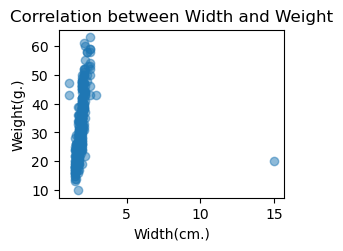

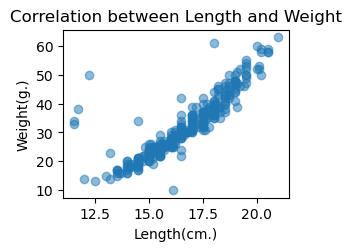

In [10]:
# Plot the correlation between 'Width' and 'Weight'
plt.subplot(2, 2, 1)
plt.scatter(new_df["width(cm.)"], new_df["weight(g.)"], alpha=0.5)
plt.xlabel('Width(cm.)')
plt.ylabel('Weight(g.)')
plt.title('Correlation between Width and Weight')
plt.show()

# Plot the correlation between 'Height' and 'Weight'
plt.subplot(2, 2, 2)
plt.scatter(new_df["length(cm.)"], new_df["weight(g.)"], alpha=0.5)
plt.xlabel('Length(cm.)')
plt.ylabel('Weight(g.)')
plt.title('Correlation between Length and Weight')
plt.show()


array([[<Axes: title={'center': 'weight(g.)'}>,
        <Axes: title={'center': 'length(cm.)'}>],
       [<Axes: title={'center': 'width(cm.)'}>, <Axes: >]], dtype=object)

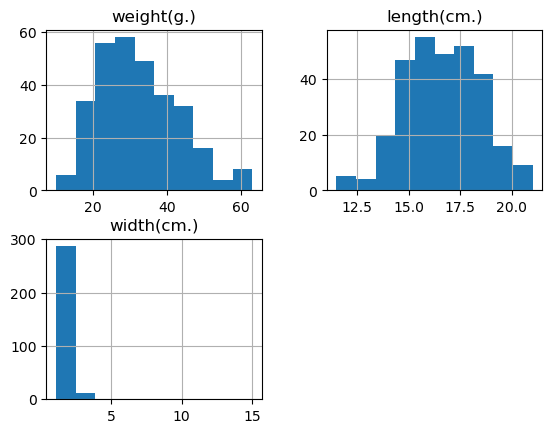

In [11]:
# Check histrogram to see distribution
new_df.hist()

<Axes: >

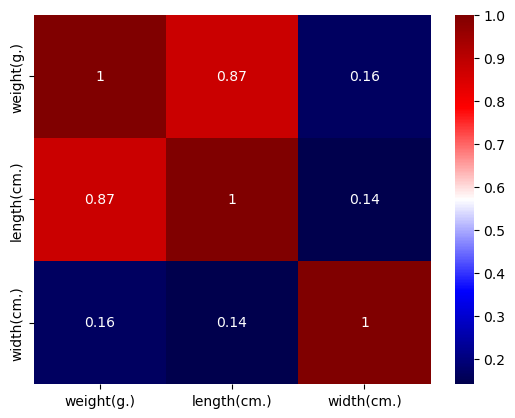

In [12]:
# Finding feature that are strong correlated
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix,annot=True,cmap="seismic")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


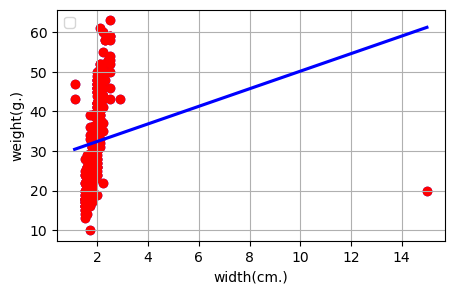

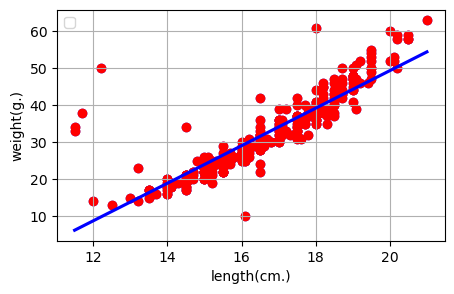

In [13]:
# Plot to see relationship with weight

plt.figure(figsize=(5,3))
plt.grid()
sns.regplot(x=new_df["width(cm.)"] , y=new_df["weight(g.)"], scatter=True, color='blue', ci=None)
plt.scatter(new_df["width(cm.)"],new_df["weight(g.)"],color='red')
plt.xlabel("width(cm.)"),plt.ylabel("weight(g.)")
plt.legend()

plt.figure(figsize=(5,3))
plt.grid()
sns.regplot(x=new_df["length(cm.)"] , y=new_df["weight(g.)"], scatter=True, color='blue', ci=None)
plt.scatter(new_df["length(cm.)"],new_df["weight(g.)"],color='red')
plt.xlabel("length(cm.)"),plt.ylabel("weight(g.)")
plt.legend()



In [14]:
print(new_df.info())
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight(g.)   299 non-null    float64
 1   length(cm.)  299 non-null    float64
 2   width(cm.)   299 non-null    float64
dtypes: float64(3)
memory usage: 7.7 KB
None


,weight(g.),length(cm.),width(cm.)
count,299.000000,299.000000,299.000000
mean,32.270903,16.635117,1.936120
std,10.711447,1.844656,0.795604
min,10.000000,11.500000,1.100000
25%,24.000000,15.200000,1.700000
50%,31.000000,16.500000,1.900000
75%,39.000000,18.000000,2.000000
max,63.000000,21.000000,15.000000


In [15]:
# Check missing data

print(new_df.isnull().sum().sort_values(ascending=False))

new_df = new_df.dropna()

new_df = new_df.reset_index()

new_df

weight(g.)     26
length(cm.)    26
width(cm.)     26
dtype: int64


,index,weight(g.),length(cm.),width(cm.)
0,0,52.0,20.1,2.1
1,1,44.0,19.0,2.1
2,2,59.0,20.2,2.5
3,3,48.0,19.0,2.0
4,4,63.0,21.0,2.5
...,...,...,...,...
294,320,33.0,17.5,2.1
295,321,30.0,16.5,1.8
296,322,33.0,17.0,2.0
297,323,32.0,16.5,2.0


In [16]:
# Separate Dataset
X = new_df[["length(cm.)","width(cm.)"]]
y = new_df["weight(g.)"]

X

,length(cm.),width(cm.)
0,20.1,2.1
1,19.0,2.1
2,20.2,2.5
3,19.0,2.0
4,21.0,2.5
...,...,...
294,17.5,2.1
295,16.5,1.8
296,17.0,2.0
297,16.5,2.0


In [17]:
# Scalling by Robust Scalling
scaler = RobustScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=X.columns)

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_scale, y, test_size=0.2, random_state=42)
print(X_train.shape,X_val.shape)
X_train

(239, 2) (60, 2)


,length(cm.),width(cm.)
6,1.071429,2.000000
183,-0.535714,-0.666667
185,-0.892857,-1.333333
146,0.785714,1.000000
30,0.535714,0.333333
...,...,...
188,-1.035714,-1.333333
71,-0.428571,-0.333333
106,0.178571,0.000000
270,-0.142857,-0.333333


Text(0, 0.5, 'Scaled Values')

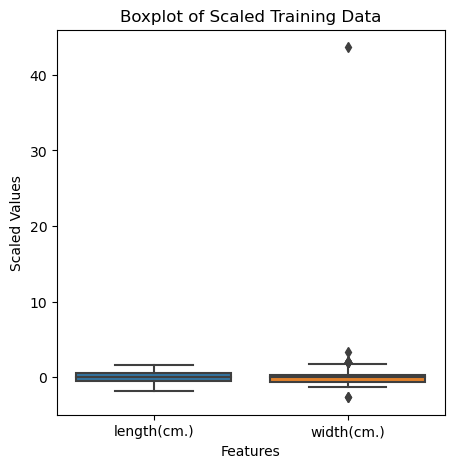

In [18]:
plt.figure(figsize=(5, 5))  # Set the figure size

# You can customize the appearance of the boxplot further if needed
sns.boxplot(data=pd.DataFrame(X_scale,columns = X.columns))

plt.title('Boxplot of Scaled Training Data')
plt.xlabel('Features')
plt.ylabel('Scaled Values')

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_percentage_error,mean_absolute_error


In [20]:
def evaluate_fn(y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    rmse = math.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true,y_pred)
    
    print(f"R2 Score: {r2}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    
    return r2,mse,mae,rmse,mape

### RidgeCV Model 

In [21]:
# RidgeCV
alphas = [0.01, 0.1, 1.0, 10.0]  # List of alpha values to consider
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train, y_train)

optimal_alpha = ridge_model.alpha_
print(f"Optimal Alpha: {optimal_alpha}")

y_pred_ridge = ridge_model.predict(X_val)
mse1 = mean_squared_error(y_val, y_pred_ridge)
print(f"Mean Squared Error: {mse1}")

mae1 = mean_absolute_error(y_val, y_pred_ridge)
print(f"Mean Absolute Error: {mae1}")

print("-------------------------")

r2_ridge,mse_ridge,mae_ridge,rmse_ridge,mape_ridge = evaluate_fn(y_val, y_pred_ridge)

Optimal Alpha: 1.0
Mean Squared Error: 290.1986680890057
Mean Absolute Error: 5.497684626502236
-------------------------
R2 Score: -1.704554222637518
MSE: 290.1986680890057
MAE: 5.497684626502236
RMSE: 17.03521846320163
MAPE: 0.2344772044936375


### Lasso Regression Model

In [22]:
alphas_lasso = np.logspace(-1,1,100)
#alphas_lasso = [0.01, 0.1, 1.0, 10.0] 
#print(alphas_lasso)
lasso_model = LassoCV(alphas=alphas_lasso,cv=3,max_iter=500)
lasso_model.fit(X_train,y_train)

optimal_alpha_lasso = lasso_model.alpha_
print(f"Optimal Alpha: {optimal_alpha_lasso}")

Optimal Alpha: 0.1


In [23]:
# Evaluate Linear Regression [LassoCV]
y_pred_lasso = lasso_model.predict(X_val)
r2_lasso,mse_lasso,mae_lasso,rmse_lasso,mape_lasso = evaluate_fn(y_val, y_pred_lasso)

R2 Score: -1.4907532360621443
MSE: 267.2578222294681
MAE: 5.412009838056956
RMSE: 16.34802196687624
MAPE: 0.22989041679800845


### Linear Regression Model

In [24]:
# Linear Regression 
linear_model = LinearRegression()
print("Default Parameters:",linear_model.get_params())
#linear_model.fit(X_train_scaled, y_train)
print("-------------------------------------------------")
#'n_jobs': np.linspace(1,10,10, dtype=int),

param_linear = {'copy_X': [True,False], 
            'fit_intercept': [True,False], 
            'positive': [True,False]}

grid_linear = GridSearchCV(linear_model,param_linear, cv=3,verbose=1,
                        scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error",
                            "neg_root_mean_squared_error"],
                        refit="r2",
                        return_train_score=True)

grid_linear.fit(X_train,y_train)

best_param_linear = grid_linear.best_params_
best_model_linear = grid_linear.best_estimator_
best_r2_linear = grid_linear.best_score_

print("Best Parameter:",best_param_linear)
print("Best Estimator:",best_model_linear)
print("Best R2 Score:",best_r2_linear)

Default Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
-------------------------------------------------
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameter: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Estimator: LinearRegression(positive=True)
Best R2 Score: 0.8002542690038451


In [25]:
# Evaluate Linear Regression 
y_pred_linear = best_model_linear.predict(X_val)
r2_linear,mse_linear,mae_linear,rmse_linear,mape_linear = evaluate_fn(y_val, y_pred_linear)


R2 Score: -1.537371236342116
MSE: 272.25993365950904
MAE: 5.4216086307520355
RMSE: 16.500301017239323
MAPE: 0.23087215307662348


### RandomForest Regressor Model

In [26]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train,y_train)

print(RF_model.get_params())
print("--------------------------------")

#'max_features': ['auto', 'sqrt', 'log2']
param_rf = {'n_estimators': [50,100,200],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

grid_rf = GridSearchCV(RF_model,param_grid=param_rf,cv=3,verbose=1,
                    scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error",
                        "neg_root_mean_squared_error"],
                    refit="r2",
                    return_train_score=True)  

grid_rf.fit(X_train,y_train)

best_param_rf = grid_rf.best_params_
best_model_rf = grid_rf.best_estimator_
best_r2_rf = grid_rf.best_score_

print("Best Parameter:",best_param_rf)
print("Best Estimator:",best_model_rf)
print("Best R2 Score:",best_r2_rf)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
--------------------------------
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameter: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Estimator: RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)
Best R2 Score: 0.8893922840320828


In [27]:
# Evaluate Random Forest Regressor 
y_pred_rf = best_model_rf.predict(X_val)
r2_rf,mse_rf,mae_rf,rmse_rf,mape_rf = evaluate_fn(y_val, y_pred_rf)

R2 Score: 0.8246591175915298
MSE: 18.814076682428855
MAE: 2.7429520845984094
RMSE: 4.337519646345
MAPE: 0.11663610390464912


### Polynomial Regression model 

In [28]:
print(PolynomialFeatures().get_params())

# x Degree
poly_feature2 = PolynomialFeatures(degree=2)
poly_feature3 = PolynomialFeatures(degree=3)
poly_feature4 = PolynomialFeatures(degree=4)

#x input and polyfeature(degree) need to fit transform before train model 
x_poly2 = poly_feature2.fit_transform(X_train)
x_poly3 = poly_feature3.fit_transform(X_train)
x_poly4 = poly_feature4.fit_transform(X_train)

model_d2 = LinearRegression()
model_d3 = LinearRegression()
model_d4 = LinearRegression()

model_d2.fit(x_poly2,y_train)
model_d3.fit(x_poly3,y_train)
model_d4.fit(x_poly4,y_train)

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


LinearRegression()

In [29]:
x_poly2_val = poly_feature2.fit_transform(X_val)
x_poly3_val = poly_feature3.fit_transform(X_val)
x_poly4_val = poly_feature4.fit_transform(X_val)

y_polyD2 = model_d2.predict(x_poly2_val)
y_polyD3 = model_d3.predict(x_poly3_val)
y_polyD4 = model_d4.predict(x_poly4_val)

print("-------------Poly Degree 2----------------")
r2_polyD2,mse_polyD2,mae_polyD2,rmse_polyD2,mape_polyD2 = evaluate_fn(y_val, y_polyD2)
print("-------------Poly Degree 3----------------")
r2_polyD3,mse_polyD3,mae_polyD3,rmse_polyD3,mape_polyD3  = evaluate_fn(y_val, y_polyD3)
print("-------------Poly Degree 4----------------")
r2_polyD4,mse_polyD4,mae_polyD4,rmse_polyD4,mape_polyD4  = evaluate_fn(y_val, y_polyD4)

-------------Poly Degree 2----------------
R2 Score: -88.72873197070868
MSE: 9627.89294045704
MAE: 15.316127745331777
RMSE: 98.12182703383097
MAPE: 0.7388188591001517
-------------Poly Degree 3----------------
R2 Score: 0.8315213357805348
MSE: 18.077760670748617
MAE: 2.715581542250689
RMSE: 4.251794993970031
MAPE: 0.10965965846731898
-------------Poly Degree 4----------------
R2 Score: -165717600.4689184
MSE: 17781498637.614944
MAE: 17217.62397687027
RMSE: 133347.28582770235
MAPE: 860.8549027558997


### SVR Model

In [30]:
svr_model = SVR()
print(svr_model.get_params())
print("-----------------------------------------------")

param_svr = {'kernel' : ('linear', 'poly', 'rbf'),
            'C' : [0.01, 0.1, 1, 10],
            'degree' : [3,5],
            "epsilon":[0, 0.01, 0.1, 1,],
            'gamma' : ('auto','scale')}

grid_svr = GridSearchCV(svr_model,param_grid=param_svr,cv=3,
                scoring=["r2","neg_mean_absolute_error","neg_mean_squared_error",
                "neg_root_mean_squared_error"],
                refit="r2",
                return_train_score=True)  

grid_svr.fit(X_train,y_train)

best_param_svr = grid_svr.best_params_
best_model_svr = grid_svr.best_estimator_
best_r2_svr = grid_svr.best_score_

print("Best Parameter:",best_param_svr)
print("Best Estimator:",best_model_svr)
print("Best R2 Score:",best_r2_svr)

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
-----------------------------------------------
Best Parameter: {'C': 10, 'degree': 3, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator: SVR(C=10, epsilon=1, gamma='auto')
Best R2 Score: 0.9019051162386552


In [31]:

svr_model = SVR(kernel='rbf',C=10,degree=3,epsilon=0.01,gamma='scale')
svr_model.fit(X_train,y_train)

# Evaluate SVR 
y_pred_svr = svr_model.predict(X_val)
r2_svr,mse_svr,mae_svr,rmse_svr,mape_svr = evaluate_fn(y_val, y_pred_svr)

R2 Score: 0.7956542670211465
MSE: 21.92629714863098
MAE: 2.9254089414370443
RMSE: 4.6825524181402365
MAPE: 0.12190646374242216


## Select Baseline 
### 1.Polynomial Regression(degree=3) 
### 2. Random Forest Regressor

-------------Poly Degree 3----------------

R2 Score: 0.8315213357805348

MSE: 18.077760670748617

MAE: 2.715581542250689

RMSE: 4.251794993970031

MAPE: 0.10965965846731898

-------------Random Forest Regressor----------------

R2 Score: 0.8246591175915298

MSE: 18.814076682428855

MAE: 2.7429520845984094

RMSE: 4.337519646345

MAPE: 0.11663610390464912